In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir, mkdir
from os.path import isdir, isfile
import matplotlib.patches as mpatches

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Plot_Box_Plots(boxes, positions, color, ax):
    flierprops = dict(marker='x', markersize=1, linestyle='none')
    whiskerprops = dict(color='black',linewidth=1.5, linestyle = '--')
    capprops = dict(color='black', linewidth=1.5)
    medianprops = dict(linewidth=1.5, linestyle='-', color='black')
    box = ax.boxplot(boxes, positions=positions, whis = [5,95], widths = [0.5]*len(positions),
                     showfliers = False, 
                     boxprops = dict(linestyle='-', linewidth=1.5, color='black'), 
                     flierprops = flierprops, whiskerprops = whiskerprops, capprops = capprops, 
                     medianprops = medianprops)
        
    for i in range(0, len(positions)):
        y = boxes[i]
        x = np.random.normal(positions[i], 0.035, size=len(y))
        ax.scatter(x,y,color = color,alpha = 0.6, marker = 'o')

In [2]:
df = pd.read_excel('/Users/harihara/Mount/Motif-Analysis/Data/ANCHOR/ANCHOR.counts.xlsx', header = [0,1,2])

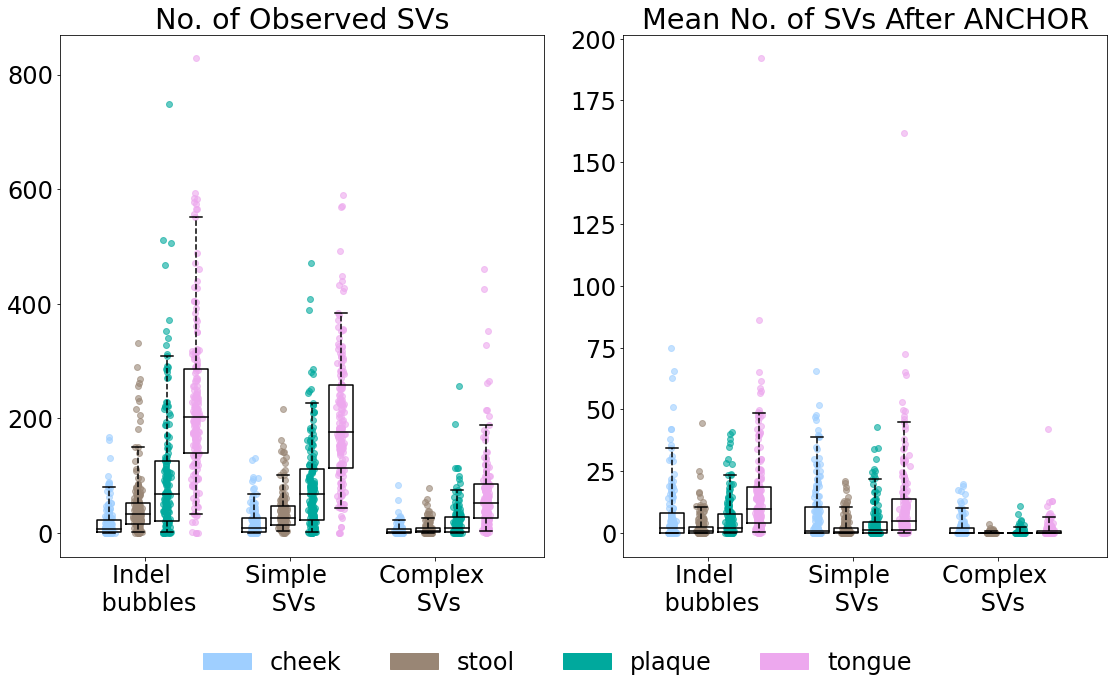

In [6]:
plt.rcParams.update(rcParams)

fig,ax = plt.subplots(1,2, figsize = (16,10))
bodysites = ['buccal_mucosa','stool','supragingival_plaque','tongue_dorsum']
variants = ['indel', 'SimpleSV','ComplexSV']
colors = ['#9FCFFF','#998675','#00A99D','#EDA8EE']
pos = [1,4,7]

for i in range(0, len(bodysites)):
    filt = df[df[('Sample', 'Unnamed: 4_level_1', 'Unnamed: 4_level_2')] == bodysites[i]]
    for j in range(0, len(variants)):
        Plot_Box_Plots([filt[(variants[j],'Observed','Counts')]], [pos[j]], colors[i], ax[0])
        Plot_Box_Plots([filt[(variants[j],'Anchor','Mean')]], [pos[j]], colors[i], ax[1])
        pos[j] += 0.6

ax[0].set_xlim([0,10])
ax[0].set_xticks([1.75, 4.75, 7.75])
ax[0].set_xticklabels(['Indel \n bubbles', 'Simple \n SVs', 'Complex \n SVs'])
ax[0].set_title('No. of Observed SVs')

ax[1].set_xlim([0,10])
ax[1].set_xticks([1.75, 4.75, 7.75])
ax[1].set_xticklabels(['Indel \n bubbles', 'Simple \n SVs', 'Complex \n SVs'])
ax[1].set_title('Mean No. of SVs After ANCHOR')

cheek_patch = mpatches.Patch(facecolor='#9FCFFF', edgecolor='#9FCFFF') 
stool_patch = mpatches.Patch(facecolor='#998675', edgecolor='#998675')
plaque_patch = mpatches.Patch(facecolor='#00A99D', edgecolor='#00A99D')
tongue_patch = mpatches.Patch(facecolor='#EDA8EE', edgecolor='#EDA8EE')

fig.legend(handles = [cheek_patch, stool_patch, plaque_patch, tongue_patch],
           labels=['cheek','stool','plaque','tongue'],
           loc='lower center', ncol = 4, frameon = False)
fig.tight_layout()
plt.subplots_adjust(bottom = 0.20)
